In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import edhec_risk_kit as erk
import yfinance as yf
import seaborn as sns
from datetime import date
from pandas_datareader import data
import work as work
import investpy

import plotly.express as px
import plotly.graph_objects as go
import plotly

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core.display import display, HTML


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
#data = work.updated_world_indices(category = 'Major', timeframe='Weekly')
#hmap = data[0]
#rawdata = data[1]
#rawdata.to_excel('rawdata.xlsx', sheet_name='Equities')

# Weekly Global Market Report


<div style="font-size: 15px">
<br>
    <b> Date: </b>  26<sup>th</sup> September, 2020
</div>

<a id ="content"></a>
## Contents:

1. [World Equities](#eq)
2. [Fixed Income](#fi)
3. [Currencies (FX)](#cur)
4. [Commodities](#comd)
5. [Charts of the Week](#charts)
6. [Key Economic Events - Next Week](#eco)

# World Equity Markets Heatmap

In [15]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def world_map(timeperiod):
    """
    """
    iso = pd.read_excel('World_Indices_List.xlsx', sheet_name='iso')
    iso.set_index('Country', inplace=True)
    rawdata.drop(['China A50', 'SmallCap 2000', 'BSE Sensex', 'Euro Stoxx 50', 'Nasdaq'], axis=0, inplace=True)
    data2 = rawdata.merge(iso['iso_alpha'], on='Country')
    data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']] = data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']].round(4)*100

    df = data2
    for col in df.columns:
        df[col] = df[col].astype(str)

    df['text'] = 'Return: '+df[timeperiod]+'%' + '<br>' \
                  'Country: '+ df['Country'] + '<br>' \

    fig1 = go.Figure(data=go.Choropleth(locations=df['iso_alpha'], z=df[timeperiod].astype(float).round(2), colorscale='RdYlGn', autocolorscale=False,
        text=df['text'], colorbar_ticksuffix = '%', colorbar_title = "Return", zmax=2.5, zmin=-4))



    return fig1.update_layout(width=950, height=500, margin=dict(l=0,r=0,b=0,t=0,pad=1),
                        xaxis=dict(scaleanchor='x', constrain='domain'), coloraxis_colorbar_x=1)

style = {'description_width': 'initial'}
interact(world_map,
             timeperiod = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Return Category: '));

interactive(children=(Dropdown(description='Return Category: ', index=2, options=(('Weekly LCL Returns', 'Chg …

<a id ="eq"></a>
## World Equities

### Local Currency & USD Performance (Weekly & YTD)
*Data is sorted by Weekly USD Performance (%)

In [5]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def hmap(sortby):
    hmap = rawdata.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}",'Chg': "{:.2f}", 'Chg (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}", '$ Chg (%)': "{:.2%}", '$ Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)', 'Chg', 'Country'], axis=1).columns))
    return hmap
    
style = {'description_width': 'initial'}
interact(hmap,
             sortby = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', index=2, options=(('Weekly LCL Returns', 'Chg (%)'), (…

In [9]:
def perf(tf):
    rawdata1 = rawdata.sort_values(by=tf, ascending=False)
    weekly_usd = rawdata1
    weekly_usd = ((pd.DataFrame(weekly_usd[tf]*100)).dropna().sort_values(by=tf, ascending=False))
    fig = px.bar(weekly_usd, color=weekly_usd.values, text=rawdata1['Country'], color_continuous_scale='rdylgn')

    fig.update_layout(title = 'World Indices Performance (%) in US Dollar Terms (EOD)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#282828"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x', width=1200, height=600)
    fig.update_traces(hovertemplate='Index: %{x} <br>Country: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf,
             tf = widgets.Dropdown(options=(('Weekly USD','$ Chg (%)'),('YTD USD','$ Chg YTD (%)')),
                                                   value = '$ Chg (%)', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=(('Weekly USD', '$ Chg (%)'), ('YTD USD', '$…

**HIGHLIGHTS**:

- **Global stocks** faltered this week as risk sentiment retreated in response to higher Covid-19 cases in the US and Europe that could risk an already uneven economic recovery. The UK government’s move to reverse the loosening of containment measures prompted concerns that its European counterparts might do the same. The Democrats are reportedly crafting a new stimulus package worth USD 2.2 trillion, sparking some new hope of a deal at Capitol Hill.


- Compared to last Thursday’s closings, the Dow and **S&P500** were down by more than 3% while **NASDAQ** lost more than 2%. The energy sector was the major loser despite recovering oil prices. Main European indexes were also down by 3 to more than 5% for the week; same goes to Asian benchmarks where all are in the reds. Looking at other asset classes, gold futures lost 3.7% as the dollar strengthened this week. Oil prices were still lower compared to last Thursday (-2% to -3%) although prices are recovering in the recent sessions.



- **European Shares Close Mostly Lower**:  European stock markets pared some losses but closed mostly in the red on Friday with Frankfurt's DAX 30 falling 1.1% to a near two-month low of 12,469 and other major indexes declining between 0.2% and 1.1%, while London's FTSE 100 was up around 0.2%. For the week, the **DAX 30 lost 4.9%, the biggest decline since mid-June**. Bank shares touching an all-time low during the session amid worries about Europe's struggle to curb the coronavirus pandemic, which could mean rising bad debts and keep interest rates at record lows for longer. Spain's number of confirmed COVID-19 cases exceeded 700,000 and the number of people hospitalized in France rose above 6,000 for the first time in two months. Also, both France and the UK announced record number of daily cases as of Thursday. 


- **Spain Stocks Close at Over 4-Month Low**: The IBEX 35 closed at 6,628 on Friday, its lowest level since May 19th, amid concerns about rising COVID-19 infections and its impact on Europe's economic recovery. **Spain**'s number of confirmed COVID-19 cases hit 700,000 and the number of people hospitalized in France rose above 6,000 for the first time in two months. Both France and the UK announced record number of daily cases as of Thursday. For the week, the Ibex tumbled 4.4%.


- **Italian Stocks End Week Higher**: The FTSE MIB added 0.9% to 18,698 during the latest week, recovering from a 1.5% loss in the previous week, after PM Conte said the possibility of a new general lockdown is unlikely and as voters agreed on the reduction of parliamentarians and regions during the constitutional referendum thus strengthening the government and reducing the risk of early elections. On Friday, the index lost 1.1%, extending a 0.1% loss in the previous session, on doubts about the global economic recovery as measures to prevent the spread of the coronavirus multiply in Europe. On the corporate front, the banking sector remained in the spotlight amid speculation that a new wave of mergers acquisitions is about to start after the merger between Intesa Sanpaolo and Ubi recently took place.


- **French Stocks Tumble 5% on the Week:** The CAC 40 tumbled around 5% to 4,730 during the latest week, as daily coronavirus cases across France spiked to record highs forcing the government to impose new restrictions in cities like Paris and Marseille. Also, the French Prime Minister warned that the government could be forced to reconfine areas. Earlier in the week, data showed France factory activity returned to growth in September while the services sector slipped back into contraction. For Friday only, the CAC 40 lost 33 points, or 0.7%, following a 0.8% drop on Thursday.


- **Mexico**’s IPC climbed 1% on Friday, ending the week 1.6% higher. Data on Friday showed Mexico's economy grew 5.7% on a monthly basis in July, topping expectations of a 5.2% climb. On an annual basis, the economy declined 9.8%, less than market expectations of a 10% contraction. On the fiscal side, Minister of Finance Arturo Herrera reiterated that no new additional stimulus is currently being contemplated, while FONATUR announced the opening the fifth tranche of the Mayan Train bidding process. During the week, **Brazil**’s Ibovespa lost 1.3%. On the data front, the domestic jobless rate dropped to 13.7% from 14.3% between the last week of August and the first week September. On the coronavirus front, Brazil recorded 32,129 cases and 818 deaths on Thursday.


- **Canada's TSX Closes Higher, Books Weekly Loss**: TSX jumped 0.9% on Friday, as a rally in the tech sector nudged global equities. During the week, the TSX retreated 0.9%. On the domestic side, the government is rolling out new economic stimulus plans as the Canada Emergency Response Benefit (CERB) expires. CERB will transition to a new USD 30 billion Canada Recovery Benefit (CRB) program and Employment Insurance (EI).

**STOCKS THAT DEFINED THE WEEK**


**NIKOLA CORP.**

- Nikola might need a jump-start after another tumultuous week in what has already been a rocky month for the electric-truck maker. The company said Monday its founder and executive chairman, Trevor Milton, would be leaving amid allegations he misled investors. **Short seller Hindenburg Research published a report earlier this month that called Nikola an “intricate fraud” and accused Mr. Milton of making exaggerated claims about the company’s technology, allegations that Nikola has disputed**. U.S. securities regulators and the Justice Department are investigating similar allegations related to public statements the company has made. Nikola shares fell 19% Monday.

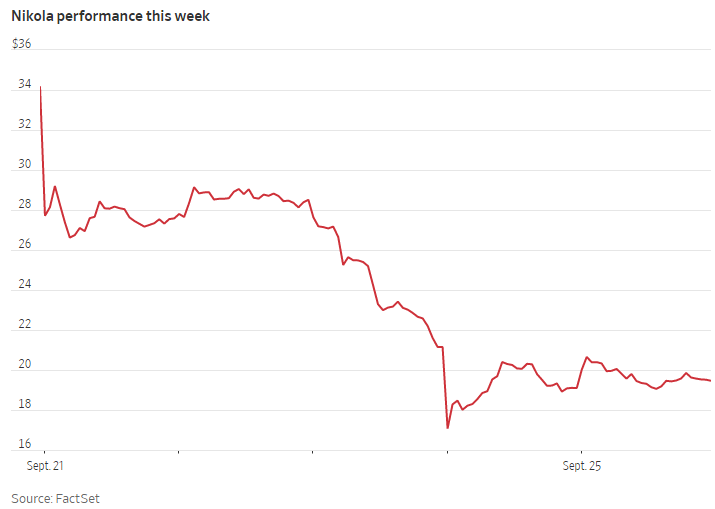
 

**NIKE INC.**

- A jump in digital sales helped Nike outrun its earlier coronavirus slump. The sportswear company reported flat quarterly revenue Tuesday, a turnaround from the pandemic plunge in its spring quarter. The sneaker giant posted a stronger than expected summer thanks largely to an 82% increase in digital sales that offset declining revenue at traditional stores. Athletic apparel makers have reported an increase in demand for clothing and casual attire as more people work and exercise at home amid the pandemic. Nike shares rose 8.8%.

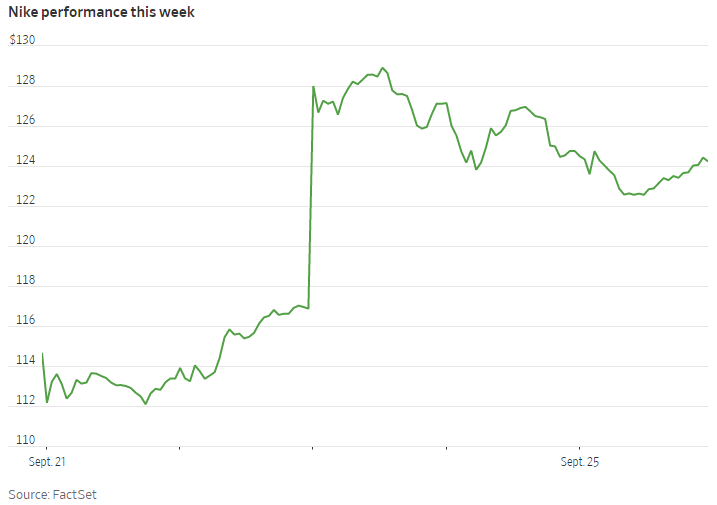

**ILLUMINA INC.**

- **Illumina said Monday that it will buy Grail Inc., a company the gene sequencer founded four years ago**. It already owns a large stake in the company and plans to pay USD 7.1 billion in cash and stock to purchase the rest. The acquisition will be Illumina’s biggest and push it further into the clinical applications of its gene sequencers and related products and services. With the purchase, **Illumina will own a developer of a blood test that promises early cancer detection, and the deal’s success will depend on successfully launching the test and persuading insurers to pay for it**. Illumina shares fell 8.6% Monday.

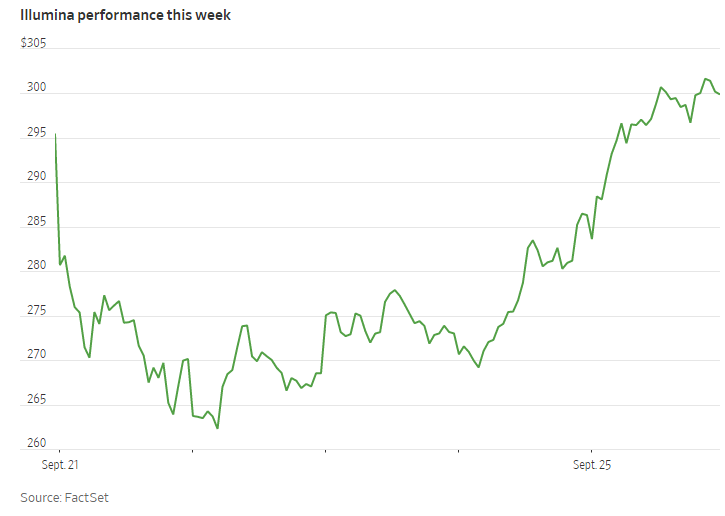

**WELLS FARGO & CO.**

- Wells Fargo Chief Executive Charlie Scharf apologized for remarks he made about recruiting Black talent after those comments triggered a backlash. In a June 16 memo he said “the unfortunate reality is that there is a very limited pool of Black talent to recruit from with this specific experience.” After that memo surfaced, Mr. Scharf told employees in a Wednesday letter that his comment was misinterpreted but acknowledged it was insensitive and reflected his unconscious bias. Shares of Wells Fargo fell 3.5% Wednesday.

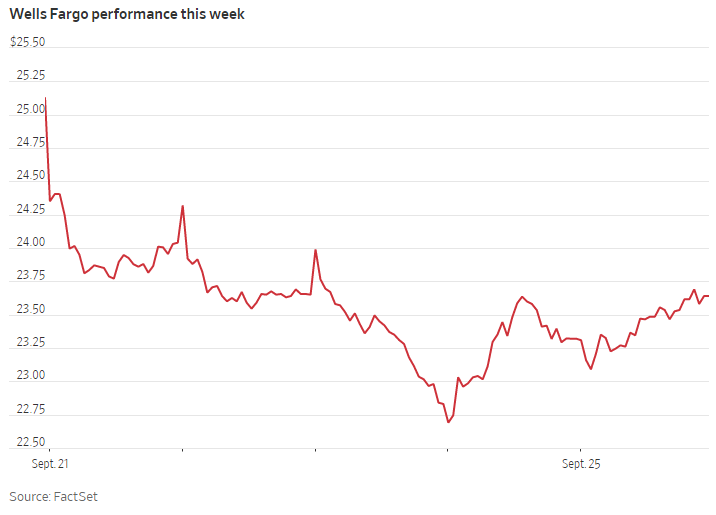

**E.W.SCRIPPS CO.**

- E.W. Scripps investors cheered the arrival of the Oracle of Omaha on Thursday. The broadcasting company agreed to buy ION Media for USD 2.65 billion with the backing of Warren Buffett’s Berkshire Hathaway Inc., BRK.B 0.83% which plans to make a USD 600 million preferred-equity investment in Scripps. The purchase of ION will roughly double Scripps’s television station footprint and allow the company to reach viewers without hefty leasing payments. Scripps agreed to sell its podcasting unit Stitcher in July and has exited newspapers and radio in recent years, shifting its focus to TV. E.W. Scripps shares gained 7.6% Thursday.

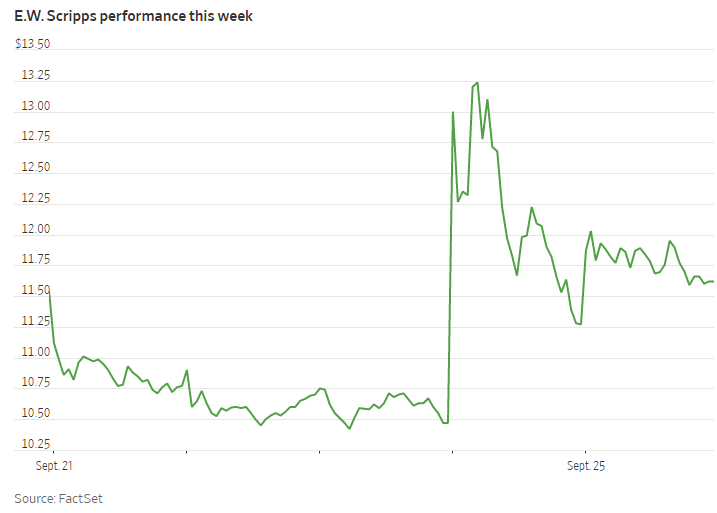

**ECONOMIC DATA RELEASES NEXT WEEK:**


- Economic calendar is light on **Monday** with the release of Malaysia exports and US Dallas Fed Manufacturing Index. **Tuesday**’s releases include the European Commission Economic Sentiment Indicator, US advance goods trade balance, the S&P Corelogic Case Schiller House Price Index and the Conference Board Consumer Confidence. 

- **Wednesday** calendar is packed with top-tiered data, chief of them being the **US and UK’s GDP readings, and the US ADP private payroll report**. Other main ones include **Japan industrial production, retail sales, China NBS PMI and New Zealand business confidence** (all scheduled for morning’s release). Other than that, **Eurozone CPI, US MNI Chicago PMI and pending home sales** are also in the pipeline.


- Moving on to **Thursday**, focus turns to the BOJ’s quarterly Tankan Survey in the morning, followed by a slew of **Markit PMI data for Japan, Malaysia, Vietnam, Eurozone, UK, and US as well as Eurozone unemployment rate**. The **US ISM manufacturing index** is also due on the same day, alongside other top tiered reading such as **personal income, personal spending, core PCE inflation, initial jobless claims as well as construction spending**. Last but not least, on **Friday**, Japan job report, **Australia retail sales** are slated for morning release, after which attention will turn to **US nonfarm payroll**, as well as factory order and University of Michigan Consumer Sentiment Index at night.

[Back to Table of Contents](#content)

<a id ="fi"></a>
## Fixed Income

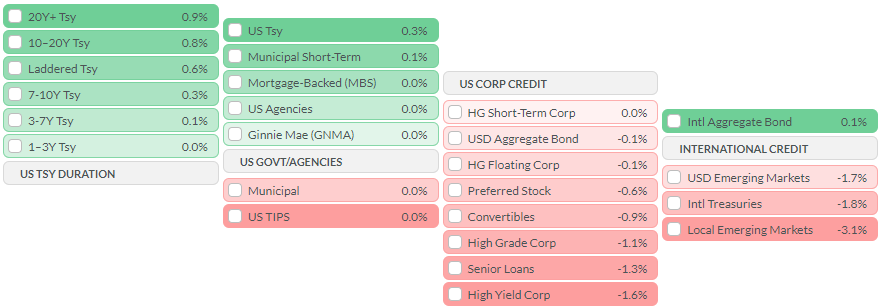

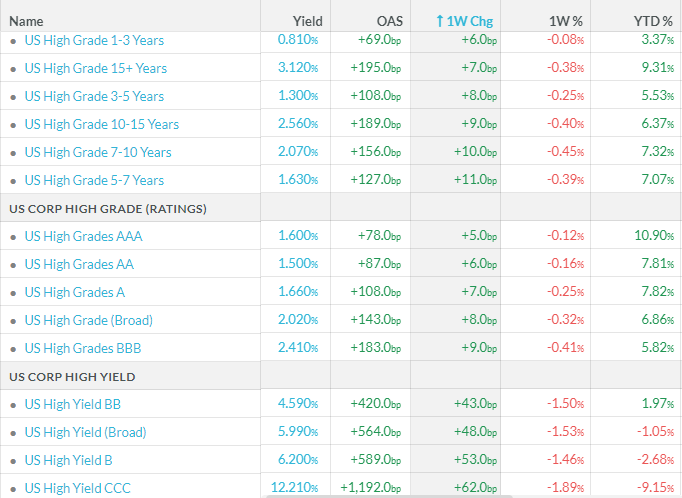

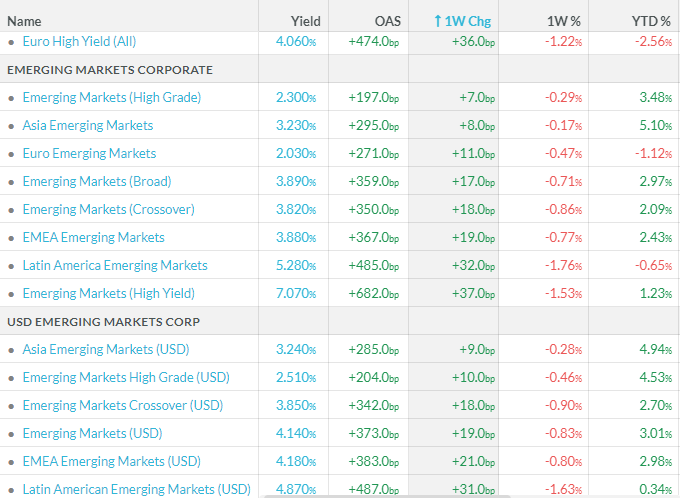

**HIGHLIGHTS**


- The week under review saw modest buying in US Treasuries with focus pretty much on Powell’s congressional testimony and some mixed economic data (i.e. negative on initial jobless claims for week ending 19th Sep vs positive new home sales for Aug). **Overall benchmark yields saw little change i.e. 0-2bps move lower as the curve steepened slightly**; with the long-end richer. The 2Y benchmark; reflective of interest rate predictions edged a mere 1bps lower at 0.13% whilst the much-watched 10Y (which traded within a very narrow 0.67%-0.70% range); notched 2bps lower at 0.67%. 


- Meanwhile the UST auctions involving a total of USSD 155b of 2Y, 5Y and 7Y notes saw solid BTC ratio of 2.52x for the 5Y compared to the other two. Bond trading activity may also be be dictated by the recent slowing down of the pace of economic rebound and the Fed’s intention to leave rates unchanged at near-zero levels for some time to come.



- Until now, the third quarter had been characterised by low volatility and a gradual grind tighter in high yield spreads. However, **more recently, risk assets have witnessed a correction, led by equities**. **Broad US High Yield has seen spreads widen by almost 53 bps this week while European High Yield was more resilient with a backup in spreads of 36bps to 474bps. In EM land, Asia High Yield has held up the best relative to broad EM, EMEA and Latin American EM which was he worst performer and saw spreads widen by 31bps while Asia HY spreads widen marginally by 9bps in line with the Investment Grade spread widening**. This recent back up in spreads could provide an opportunity to earn carry in a zero interest rate environment. (All data as of 24 September 2020).



- Investors have been momentarily spooked by the recent flare up in risk markets. US high yield exchange-traded funds (ETFs) were subject to outflows of USD 1.3 billion on 21 September and USD 1.6 billion on 22 September—the biggest exodus since February. However, outflows from actively managed US high yield mutual funds have been much lower (- USD 140 million on 22 September), suggesting that the ETF outflows have been driven by fast money reacting to the recent volatility. Therefore, with demand for yield still overwhelming, thus, recent outflows are likely to prove to be a temporary clearing out.



**CENTRAL BANKS ACTION UPDATE**


- **Mexico's central bank cut its benchmark interest rate for the eleventh straight meeting on September 26th, 2020, lowering it 25 basis points to 4.25% and bringing borrowing costs to its lowest since August of 2016**. Economic activity in Mexico began to recover in June and July, although an environment of uncertainty and downside risks prevails. Annual inflation rose to 4.05% in August from 3.62% in July due to higher energy prices, while it remained stable at levels above the goal of 3%.


- **The Central Bank of Turkey hiked its benchmark one-week repo rate by 200 bps to 10.25 percent during its September meeting, surprising markets that had forecast the rate to remain unchanged**. Policymakers said the decision aims to restore the disinflation process and support price stability as the lira has hit an all-time low. The central bank also said that economic activity is recovering markedly in the third quarter owing to gradual steps towards normalization and the strong credit impulse, while inflation rate has been higher than expected.


- **The Reserve Bank of Australia is assessing various monetary policy options to meet inflation and employment targets, amid a gradual and uneven recovery from the prolonged COVID-19 crisis, Deputy Governor Guy Debelle said in a speech**. The first option is foreign exchange intervention but it is not clear whether this would be effective as the Australian dollar was aligned with fundamentals, he added. **The second option is to buy bonds with maturities beyond three years to help lower longer-dated government bond rates**. "A third option is to lower the current structure of rates in the economy a little more without going into negative territory". A fourth option is negative rates that in the short term it can contribute to a lower exchange rate but in the medium-term effectiveness can wane including through the effect on the financial system.


- **The Swiss National Bank kept its policy rate at -0.75 percent** and the interest rate it charges on overnight deposits it holds for commercial banks at -0.75 percent during its September meeting, aiming to cushion the negative impact of the pandemic on economic activity and inflation. The central bank also said it is **willing to intervene more strongly in the foreign exchange market as the Swiss franc remains highly valued**. Policymakers noted that interest rates will probably remain at current levels until at least 2022, saying that the inflation rate is set to average -0.6 percent this year, before getting back into positive territory in 2021 (0.1 percent) and increasing slightly further in 2022 (0.2 percent).



- **The Bank of Thailand left its key policy rate unchanged at an all-time low of 0.5 percent on September 23rd 2020, as widely expected**. Policymakers upgraded its 2020 GDP outlook and now expect the economy to shrink 7.8 percent this year compared to an 8.1 percent drop earlier estimated. However, the 2021 expansion was revised lower to 3.6 percent from 5 percent. Consumer prices are expected to fall at a slower 0.9 percent in 2020 (vs -1.7 percent in the earlier estimate) and to rise ata faster 1 percent in 2121 (vs 0.9 percent). The central bank also said it remained ready to use appropriate monetary policy tools if necessary and that fiscal policy should play a major role in helping the economy.

[Back to Table of Contents](#content)

<a id ="cur"></a>
## Currencies (FX)

In [16]:
ccy = pd.read_excel('World_Indices_List.xlsx', sheet_name='Currencies', header=0)
ccy_data = yf.download(list(ccy['Ticker']), start='2020-01-01', progress=False)
ccy_data = ccy_data['Close'].ffill()

In [17]:
def ccy_perf():
    oned_lcl = pd.concat([(ccy_data.iloc[-1,:]/ccy_data.iloc[-6,:]-1),
                            (ccy_data.iloc[-1,:]/ccy_data.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Ticker'
    oned_lcl = ccy.merge(oned_lcl, on='Ticker')
    oned_lcl= oned_lcl.set_index('Ticker')
    return oned_lcl

ccy = ccy_perf()

In [23]:
def ccy_hmap(sortby):   
    hmap = ccy.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Chg WTD (%)': "{:.3%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(ccy.drop(['Name'], axis=1).columns), vmax=0.07)
    return hmap
    
interact(ccy_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

### Top Currencies Live Cross Rates

In [24]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/forex-cross-rates/" rel="noopener" target="_blank"><span class="blue-text">Forex Rates</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-forex-cross-rates.js" async>
  {
  "width": 770,
  "height": 400,
  "currencies": [
    "EUR",
    "USD",
    "JPY",
    "GBP",
    "CHF",
    "AUD",
    "CAD",
    "NZD",
    "CNY"
  ],
  "isTransparent": false,
  "colorTheme": "light",
  "locale": "en"
}
  </script>
</div>
<!-- TradingView Widget END -->
""")

In [25]:
def perf_ccy(timeframe):
    weekly_usd = ccy
    if timeframe=='Weekly':
        weekly_usd1 = ccy.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'], color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = ccy.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'])

    fig.update_layout(title = 'World Currencies ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Ticker: %{x} <br>Name: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_ccy,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS:**

> Dollars surged and stock market dropped as US political battle and rising Covid-19 cases continued to sap investors’ risk appetite. Investors are likely to unwind some of the USD short position to lock in some profit ahead of upcoming US election. The DXY strengthened by 1.77% to 94.3 from a week ago at the time of writing. 10y-UST yield was steady at 0.67%.


> In the Eurozone, weakness in service sector and higher Covid-19 cases continued to pressure EUR and GBP. Commodity currencies were the hardest hit as concerns on any new restrictions will weigh on global demand. Growing expectation of RBA easing in the future coupled with weaker commodity prices sent AUD trading 3.5% lower WoW. Next week’s PMI data will be key data to determine the pace of economic recovery.


- **USD:** : The dollar index settled around a **2-month high of 94.6** on Friday, and was **up near 1.8% for the week**, the biggest weekly advance since the first week of April. Investors welcomed prospects of a new smaller USD 2.4 trillion Democrats sponsored coronavirus aid bill. Also, the greenback was pushed up by the need for liquidity, global growth concerns as Europe battles with the second wave of coronavirus infections and a less dovish tone from the Fed compared to the ECB and the BoJ. A partial rebound towards 96 is not implausible, from c.94.32 levels. ISM and non-farm payrolls key focus for the coming week.


- **EUR**: The euro traded around 1.165 on Friday, not far from a **two-month low of 1.163** hit the day before, as concerns about a second wave of coronavirus infections in Europe sent investors rushing for safety. Spain's number of confirmed COVID-19 cases exceeded 700,000, while the number of people hospitalized in France rose above 6,000 for the first time in two months. Authorities across Europe have warned of tougher times ahead. Focus turns to CPI prints.


- **GBP**: The British pound traded around 1.275 on Friday, little-changed from the previous session and recovering from a **two-month low of 1.2676** on Wednesday. Investors are taking the view that more stimulus measures to help the economy might be announced soon after UK Chancellor Rishi Sunak unveiled Thursday a government's plan aimed to protect jobs over the next six months, amid a surge in COVID-19 cases. Still, the threat of new lockdown measures, the prospect of a no-deal Brexit and the possibility of negative rates continued to weigh on the currency.


- **JPY**: JPY could not sustain the USD strength momentum and pulled back, despite registering more resilient performances within G10 space. Pair pulled up from a low of 104 on 21 September to 105.5 by Friday open. Near-term we may still see JPY resilience compared to other G10 currencies, and a relatively solid resistance of 106. Tankan and jobless rate key data to watch for the coming week. Meantime, the Health Ministry noted Japan could face a resurgence of coronavirus infections as the pace of decline in the number of new infections has been slowing recently, with some regions marking a rebound.


- **AUD**: Aussie was a main casualty from the adverse risk mood, **falling more than 3.5%** WOW. AUD/USD reached c. 0.705 levels in the process, after staying around the 0.73 big figure until 21 September. A break away of the 0.70 support (also 100-day MA) can bring AUD/USD lower towards the 0.6773 200- day MA. For the week ahead, focus is on retail sales data for August. Meantime, the Australian government said it would simplify bank lending rules to free up credit in a bid to stimulate the coronavirus-hit economy. Federal Treasurer Josh Frydenberg said that the move will ease the regulatory burden and reduce the cost and time faced by consumers and small businesses seeking to get credit. The federal government has also revealed its biggest deficit on record AUD 85.3 billion or 4.3% of GDP for 2019-20.


- **MXN**: The Mexican peso traded lower at 22.3 against the USD, remaining close to a **seven-week low** touched in the previous session on the back of a stronger dollar. The currency was also pressured by a drop in oil prices and mounting concerns over surging global coronavirus infections and its impact on the economic recovery. On September 24th, the Bank of Mexico cut the its benchmark interest rate by 25 bps to a four-year low of 4.25%, citing an environment of uncertainty and downside risks and amid rising inflation.


- **BRL**: The Brazilian real traded lower at 5.5 against the greenback, close to a **five-week low** touched in the previous session amid a stronger dollar. The currency was also pressured by domestic fiscal and political concerns and mounting worries about rising global coronavirus infections. On September 24th, Brazil’s National Monetary Council announced new measures to expand and speed up the flow of credit to micro-sized businesses, including a rise in the annual revenue limit for firms to access the credit.


- **CAD**: The Canadian dollar traded lower at 1.33 against the USD, hovering near an over **seven-week low** touched in the previous session, on the back of a stronger dollar, mounting concerns over a spike in global coronavirus cases and a drop in oil prices. Earlier this week, Prime Minister Trudeau unveiled a plan to help the economy recovery from the coronavirus fallout, including a commitment to extend wage subsidies until next summer, and support for industries hardest hit by the pandemic. At the same time, Canada’s government proposed boosting a weekly payout for the jobless that would replace the current emergency COVID-19 income support that is set to end this weekend.


- **ZAR**: The South African rand hovered around 17 per dollar on Friday and was set for an **over 4% weekly loss** after hitting a 6-month high in the previous week. Emerging market currencies have been hit by a sell-off, as anxiety about the fate of the economic recovery due to rising coronavirus cases, especially in Europe, and lack of US stimulus dampen investors sentiment. However, the sell-off eased on Friday, on prospects that a new US Covid-19 relief package is coming soon. Domestically, fiscal risks persist ahead of the mid-term budget in October.


- **RUB**: The Russian ruble continued to depreciate on Friday to cross 78 per USD, close to its lowest level since early-April and heading for an over 2% weekly drop. Losses came amid low oil prices and risk-off sentiment as the global economic outlook is shrouded in uncertainty. Still, on Friday the benchmark Brent crude traded slightly higher at around USD 42 a barrel boosted by hopes of further stimulus in the US. Last week, the Russian Central Bank held its benchmark interest rate at 4.25% but left the door open to further interest rate cuts in upcoming monetary policy meetings

[Back to Table of Contents](#content)

<a id ="comd"></a>
## Commodities

In [26]:
#comds= pd.read_excel('World_Indices_List.xlsx', sheet_name='Commodities', header=0)

In [29]:
tdy = str(date.today().day)+'/'+str(date.today().month)+'/'+str(date.today().year)

#def comd_data(commodity):
#    df = investpy.get_commodity_historical_data(commodity=commodity, from_date='01/01/2020', to_date=tdy)['Close']
#    df = pd.DataFrame(df)
#    df.columns = [commodity]
#    return df

#df = pd.DataFrame(index=pd.bdate_range(start='2020-01-01', end=date.today()))
#df.index.name='Date'

#for i in range(len(comds)):
#    df = df.join(comd_data(comds['Commodities'][i]), on='Date')

#df = df.ffill().dropna()
#df.to_excel('comd1.xlsx')

In [30]:
df = pd.read_excel('rawdata.xlsx', sheet_name='Commodities', header=0, index_col=0)

In [31]:
def comd_perf():
    oned_lcl = pd.concat([df.iloc[-1,:], (df.iloc[-1,:]/df.iloc[-6,:]-1),
                            (df.iloc[-1,:]/df.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Price (EOD)', 'Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Commodities'
    return oned_lcl

comd = comd_perf()
comd.drop('Lumber', axis=0, inplace=True)

In [32]:
def comd_hmap(sortby):   
    hmap = comd.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}", 'Chg WTD (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)'], axis=1).columns))
    return hmap
    
interact(comd_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [33]:
def perf_comd(timeframe):
    weekly_usd = comd
    if timeframe=='Weekly':
        weekly_usd1 = comd.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).dropna().sort_values(by='Chg WTD (%)', ascending=True))
        fig = px.bar(weekly_usd, color=weekly_usd.values, orientation='h', color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = comd.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).dropna().sort_values(by='Chg YTD (%)', ascending=True))
        fig = px.bar(weekly_usd, color=weekly_usd.values, orientation='h')

    fig.update_layout(title = 'Commodities ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Return (%)',
                       yaxis_title='Commodities', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Commodity: %{y} <br>Return: %{x:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_comd,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS**

> Commodities , traded lower during the week where the stronger dollar left many markets bruised. The Bloomberg Commodity Index, which tracks a basket of major commodities spread evenly across energy, metals and agriculture, traded lower by 3.2% with energy, due to strong gains in natural gas, being the only sector strong enough to put up a fight against the adverse impact of the stronger dollar. The break below €1.1700 in EURUSD therefore created some nervousness about a deeper correction which hurt markets with an elevated bullish positioning in particular, such as precious and industrial metals. Silver slumped and has now already clocked up two +20% corrections since almost hitting USD 30/oz just six weeks ago. Wild swings like these have left a trail of battered investors, thereby raising some doubts about the metal’s ability to move higher.


-  Despite several headwinds, **crude oil** managed to avoid the selling seen across other commodities. While down on the week, it still managed to put up a defence despite doubts about the rebound in demand with lockdown measures on the rise, together with the risk of rising supply and the stronger dollar. All perhaps signs that the market had taken note of the strong verbal intervention given by the Saudi Energy Minister Prince Abdulaziz bin Salman. At the recent OPEC+ meeting he condemned members that tried to get away with pumping too much crude while also challenging short sellers in the futures market who in the week to September 11 held a combine 250 million barrel short in WTI and Brent crude oil.


- Additional support came from an across the board weekly drop in U.S. crude oil and product stocks and a **monthly survey from the Dallas Fed in which they asked 160 executives from the oil and gas firms questions about the current state of the market. Some 66% replied that U.S. production had already peaked, and the vast majority needed a WTI price above USD 50/b in order to substantially increase the U.S. oil rig count**. On that basis, with the current lack of progress towards higher prices, we may see a further drop in U.S. oil production over the coming months. Lower U.S. production and elevated stock levels around the world have supported a reduction in WTI’s discount to Brent to less than two dollars per barrel.


- Another casualty of the renewed dollar strength and with that lower risk appetite was **copper**. The white metal’s impressive recovery from the March low had already started to slow with the price of HG copper struggling to extend its gains beyond USD 3.1/lb. The rally seen across industrial metals, not least copper, in recent months has been driven by a post-pandemic recovery in Chinese demand supported by credit and scattered supply disruptions.


- While the fundamental outlook remains supportive, the lack of fresh upward catalysts and an elevated net-long position held by speculators such as hedge funds and CTAs helped drive a correction to USD 2.91/lb this past week. Depending on the resilience among speculators and developments elsewhere, the price correction can potentially extend further towards the early August low at USD 2.77/lb.


- **Gold** dropped below USD 1900/oz but managed to find support ahead of key support at USD 1837/oz, the 38.2% retracement of the March to August rally. **Silver, which as mentioned recorded its second bear market (a 20% movement from the recent peak)**, saw its relative value against gold tank to a near two-month low. In the short-term, both metals might be facing some headwinds from the recent drop in inflation expectations leading to rising real yields as well as the strong dollar and the recent high correlation with stocks, which may cause it to continue to trade nervously ahead of the November U.S. election.


- It does highlight how markets across different asset classes continue to show a high level of correlation. Given the latest price movements it is very clear to see what power the dollar holds over the market with regards to overall level of risk appetite. It is therefore probably not surprising to find that several different markets from the S&P 500 and AUDUSD to gold, oil and coffee all managed to find support and attempted a bounce from their 100-day moving average.


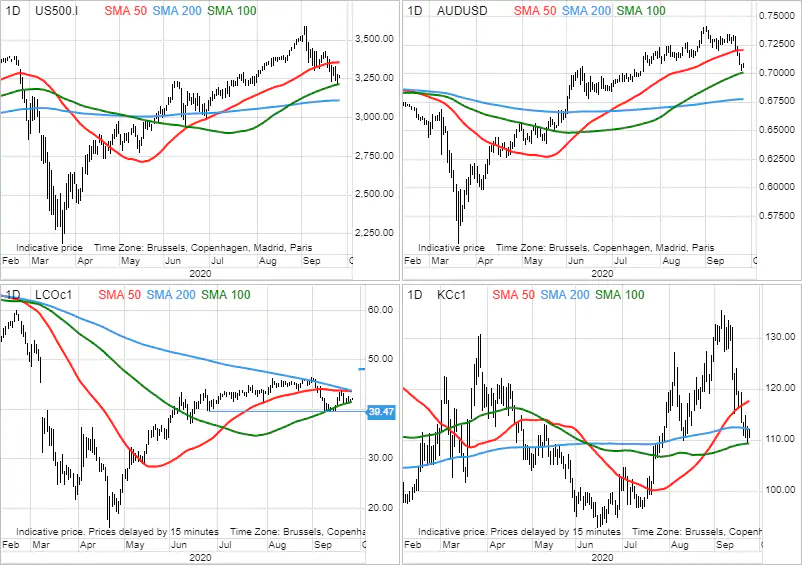

[Back to Table of Contents](#content)

<a id ="charts"></a>
### CHARTS OF THE WEEK

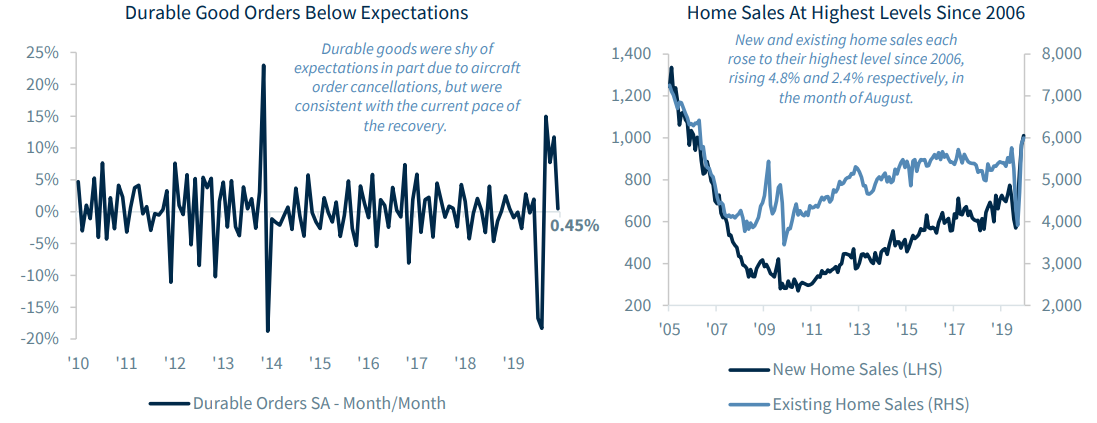

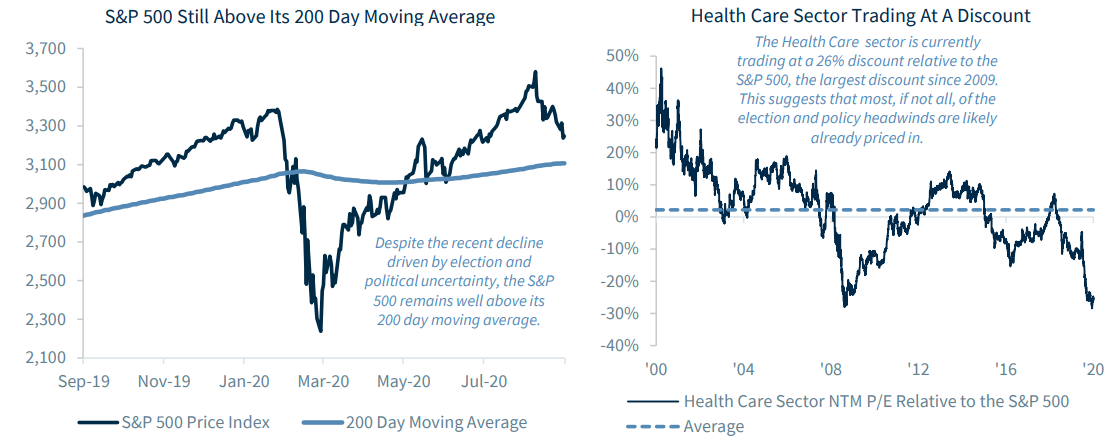

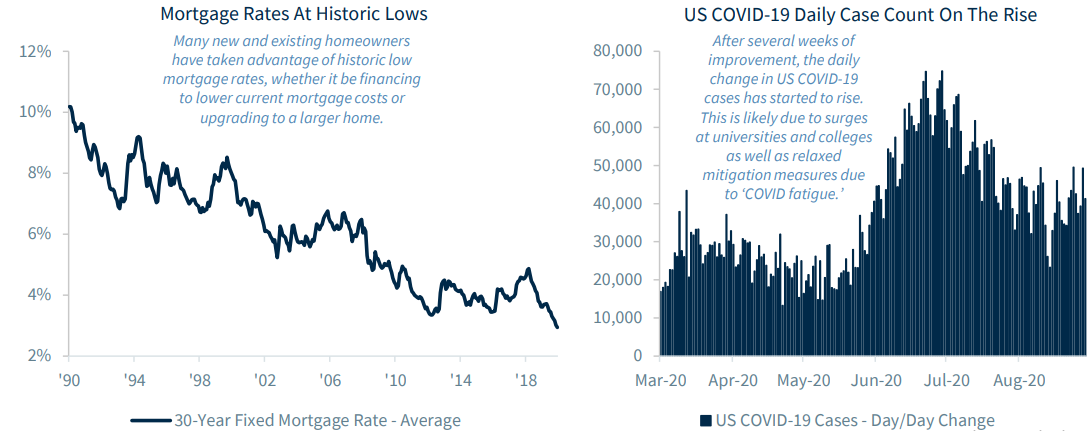

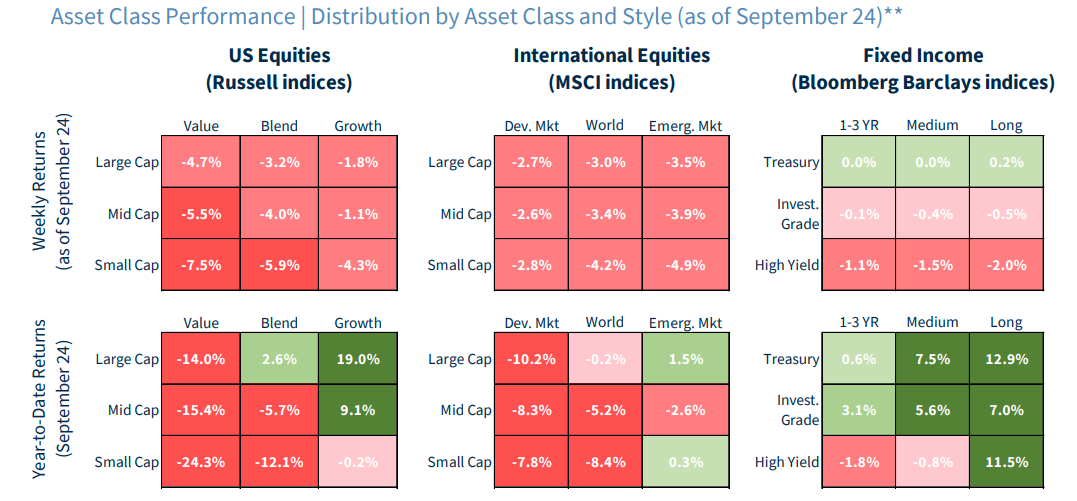

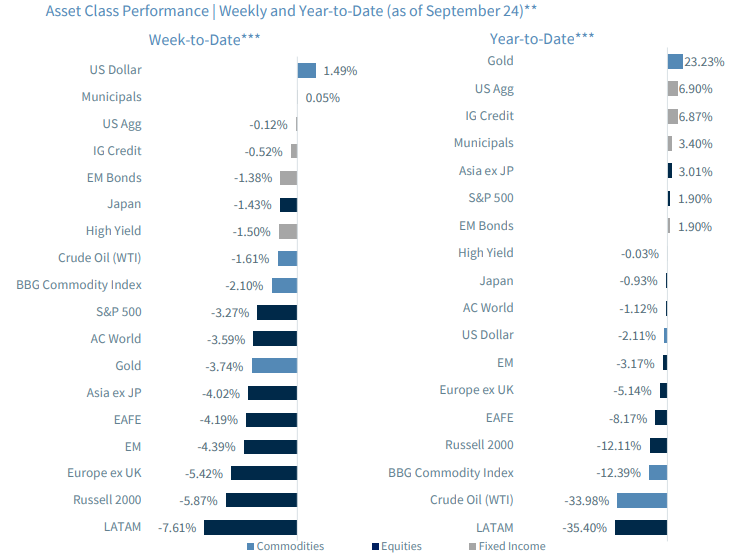

[Back to Table of Contents](#content)

<a id ="eco"></a>

## Key Economic Events Next Week 

In [34]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/economic-calendar/" rel="noopener" target="_blank"><span class="blue-text">Economic Calendar</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-events.js" async>
  {
  "colorTheme": "light",
  "isTransparent": false,
  "width": "700",
  "height": "600",
  "locale": "en",
  "importanceFilter": "0,1"
}
  </script>
</div>
<!-- TradingView Widget END --> """)

[Back to Table of Contents](#content)